<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/transfer_10%E6%AC%BE_scooter_20211028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
import os
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

## 讀取 google drive圖檔 :

In [4]:
# 600以上 : S2、GP、KRV、FIDDLE、SR、活力、新名流、DRG、新迪爵、LIMI、六代勁戰
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.jpg") 

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*.jpg") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*.jpg")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*.jpg") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*.jpg")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*.jpg")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*.jpg")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*.jpg") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*.jpg")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*.jpg")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*.jpg")







In [5]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
})
df

,path,ans
0,./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...,0
1,./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...,0
2,./原始照片(含外拍及網路)/GOGORO_S2/01_s2_abs_indigo_03_l...,0
3,./原始照片(含外拍及網路)/GOGORO_S2/1527683192-25814e6d13...,0
4,./原始照片(含外拍及網路)/GOGORO_S2/3FA8F684E6-SP-9712488...,0
...,...,...
9026,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242123753...,10
9027,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242132239...,10
9028,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242140840...,10
9029,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242150895...,10


#### 偷別人卷積網路 :
###### google keras application

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16  # 偷別人眼睛
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

##### 高參數 =>訓練資料要多
##### 低參數 =>訓練資料要少

#####開始疊層數

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
cnn.layers

In [ ]:
for l in cnn.layers:
  l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dense(7, activation="softmax")
]
model = Sequential(cnn.layers + layers) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

##### 模型 compile

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

###### 先看一下圖片

[[[ 1.3306100e+02  1.1622100e+02  1.0832000e+02]
  [ 1.2906100e+02  1.1322100e+02  1.0532000e+02]
  [ 1.3006100e+02  1.1722100e+02  1.1032000e+02]
  ...
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]]

 [[ 1.3106100e+02  1.1422100e+02  1.0632000e+02]
  [ 1.2406100e+02  1.0522100e+02  1.0132000e+02]
  [ 1.1306100e+02  8.2221001e+01  1.0232000e+02]
  ...
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]]

 [[ 1.3206100e+02  1.1522100e+02  1.0732000e+02]
  [ 1.2506100e+02  1.0722100e+02  1.0332000e+02]
  [ 1.0906100e+02  7.0221001e+01  1.0232000e+02]
  ...
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
  [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]]

 ...

 [[-3.1939003e+01 -4.6778999e+01 -5.3680000e+01]
  [-3.2939003e+01 -4.7778999e+01 -5.468

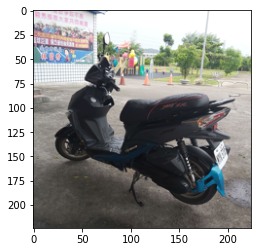

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.vgg16 import preprocess_input 
p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
# VGG16 的資料是怎麼預處理的 ? google preprocess_input github
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [ ]:
p

0       /content/drive/MyDrive/Tebame_第四組_機車辨識/牧莛/gp12...
1       /content/drive/MyDrive/Tebame_第四組_機車辨識/牧莛/gp12...
2       /content/drive/MyDrive/Tebame_第四組_機車辨識/牧莛/gp12...
3       /content/drive/MyDrive/Tebame_第四組_機車辨識/牧莛/gp12...
4       /content/drive/MyDrive/Tebame_第四組_機車辨識/牧莛/gp12...
                              ...                        
4572    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪後_全款大...
4573    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪後_全款大...
4574    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪後_全款大...
4575    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪後_全款大...
4576    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪後_全款大...
Name: path, Length: 4577, dtype: object

### generator

In [ ]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [ ]:
def data_generator(x, y, batch_size=19):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
print(x_gen)
print(y_gen)


(19, 224, 224, 3)
(19,)
[[[[ 121.061       110.221       104.32      ]
   [ 123.061       112.221       106.32      ]
   [ 117.061       106.221       100.32      ]
   ...
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]]

  [[ 119.061       108.221       101.32      ]
   [ 122.061       111.221       105.32      ]
   [ 126.061       114.221       108.32      ]
   ...
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]]

  [[ 117.061       106.221        98.32      ]
   [ 118.061       107.221        99.32      ]
   [ 121.061       108.221       101.32      ]
   ...
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]]

  ...

  [[  41.060997     27.221        21.32      ]
   [  39.060997     22.221        16.32      ]
  

In [ ]:
gp_x = x[y == 0]
vivo_x = x[y == 1]
gryphus6_x = x[y == 2]
SR_x = x[y == 3]
DRG_x = x[y == 4]
FIDDLE_x = x[y == 5]
S2_x = x[y == 6]
print("gp 共:", len(gp_x))
print("活力 共:", len(vivo_x))
print("勁戰6 共:", len(gryphus6_x))
print("SR 共:", len(SR_x))
print("DRG 共:", len(DRG_x))
print("FIDDLE 共:", len(FIDDLE_x))
print("S2 共:", len(S2_x))

gp 共: 537
活力 共: 693
勁戰6 共: 709
SR 共: 482
DRG 共: 381
FIDDLE 共: 1157
S2 共: 618


In [ ]:
from sklearn.model_selection import train_test_split

 # gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2

gp_380 = np.random.choice(gp_x, 380, replace=False)
gp_342, gp_38 = train_test_split(gp_380, test_size=0.1)

vivo_380 = np.random.choice(vivo_x, 380, replace=False)
vivo_342, vivo_38 = train_test_split(vivo_380, test_size=0.1)

gryphus6_380 = np.random.choice(gryphus6_x, 380, replace=False)
gryphus6_342, gryphus6_38 = train_test_split(gryphus6_380, test_size=0.1)

SR_380 = np.random.choice(SR_x, 380, replace=False)
SR_342, SR_38 = train_test_split(SR_380, test_size=0.1)

DRG_380 = np.random.choice(DRG_x, 380, replace=False)
DRG_342, DRG_38 = train_test_split(DRG_380, test_size=0.1)

FIDDLE_380 = np.random.choice(FIDDLE_x, 380, replace=False)
FIDDLE_342, FIDDLE_38 = train_test_split(FIDDLE_380, test_size=0.1)

S2_380 = np.random.choice(S2_x, 380, replace=False)
S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)


x_train = np.concatenate((gp_342, vivo_342, gryphus6_342, SR_342, DRG_342, FIDDLE_342, S2_342))
y_train = np.array([0] * len(gp_342) + [1] *len(vivo_342) + [2] *len(gryphus6_342) + [3] *len(SR_342) + [4] *len(DRG_342) + [5] *len(FIDDLE_342) + [6] *len(S2_342))
x_test = np.concatenate((gp_38, vivo_38, gryphus6_38, SR_38, DRG_38, FIDDLE_38, S2_38))
y_test = np.array([0] * len(gp_38) + [1] *len(vivo_38) + [2] *len(gryphus6_38) + [3] *len(SR_38) + [4] *len(DRG_38) + [5] *len(FIDDLE_38) + [6] *len(S2_38))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2394,)
(266,)
(2394,)
(266,)


In [ ]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("scooter.h5", save_best_only=True)
]

model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=test_generator,
    validation_steps=2, 
    callbacks=callbacks
                    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 83s 4s/step - loss: 1.8701 - acc: 0.2658 - val_loss: 1.9554 - val_acc: 0.1842
Epoch 2/100
20/20 [==============================] - 78s 4s/step - loss: 1.7319 - acc: 0.3658 - val_loss: 1.5212 - val_acc: 0.4211
Epoch 3/100
20/20 [==============================] - 75s 4s/step - loss: 1.5040 - acc: 0.5421 - val_loss: 1.4838 - val_acc: 0.4211
Epoch 4/100
20/20 [==============================] - 64s 3s/step - loss: 1.4047 - acc: 0.6079 - val_loss: 1.3462 - val_acc: 0.5526
Epoch 5/100
20/20 [==============================] - 61s 3s/step - loss: 1.2578 - acc: 0.7000 - val_loss: 1.1407 - val_acc: 0.6579
Epoch 6/100
20/20 [==============================] - 59s 3s/step - loss: 1.2120 - acc: 0.7263 - val_loss: 0.9368 - val_acc: 0.7368
Epoch 7/100
20/20 [==============================] - 52s 3s/step - loss: 1.1224 - acc: 0.7526 - val_loss: 1.1745 - val_acc: 0.6579
Epoch 8/100
20/20 [==============================] - 51s 3s/step - loss: 1.0324 - a

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)



答對機率: [0.06705891 0.06768733 0.03058514 0.56584007 0.00176545 0.10757065
 0.15949252]


In [ ]:
pre = pre.argmax(axis=1)

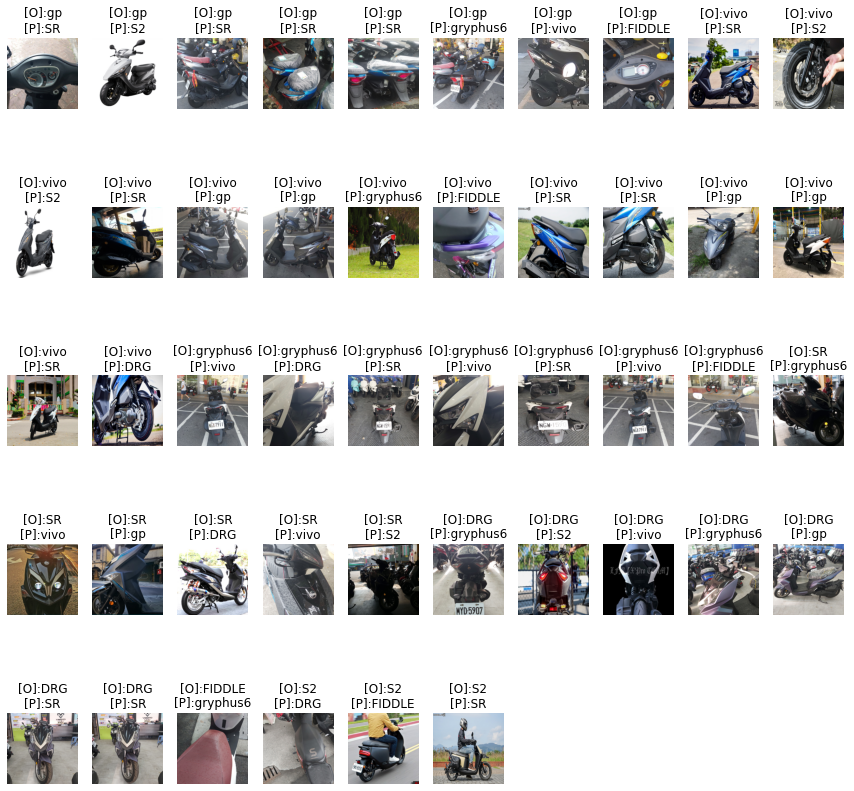

In [ ]:
trans = ["gp", "vivo", "gryphus6", "SR", "DRG", "FIDDLE", "S2"]
 # gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(15, 15))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(7)],
        columns=["{}(預測)".format(trans[i]) for i in range(7)]
)

,gp(預測),vivo(預測),gryphus6(預測),SR(預測),DRG(預測),FIDDLE(預測),S2(預測)
gp(正確),30,1,1,4,0,1,1
vivo(正確),4,24,1,5,1,1,2
gryphus6(正確),0,3,31,2,1,1,0
SR(正確),1,2,1,32,1,0,1
DRG(正確),1,1,2,2,31,0,1
FIDDLE(正確),0,0,1,0,0,37,0
S2(正確),0,0,0,1,1,1,35


Enter:https://image.u-car.com.tw/articlethumb_97_63261.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


預測: FIDDLE
機率: [0.0104621  0.05547726 0.16541299 0.06917915 0.01685867 0.63838524
 0.0442246 ]


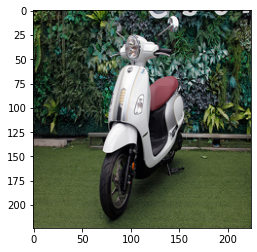

In [ ]:
import requests
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)
#trans = ["gp", "vivo", "gryphus6", "SR", "DRG", "FIDDLE", "S2"]

In [ ]:
#01:33:12